In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sales_processing import fill_in_dates
from pandas.plotting import lag_plot

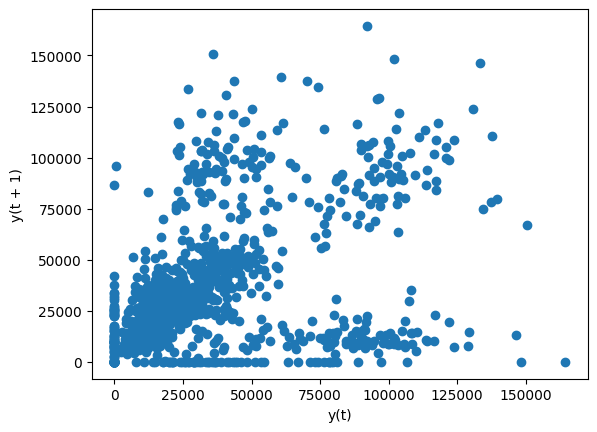

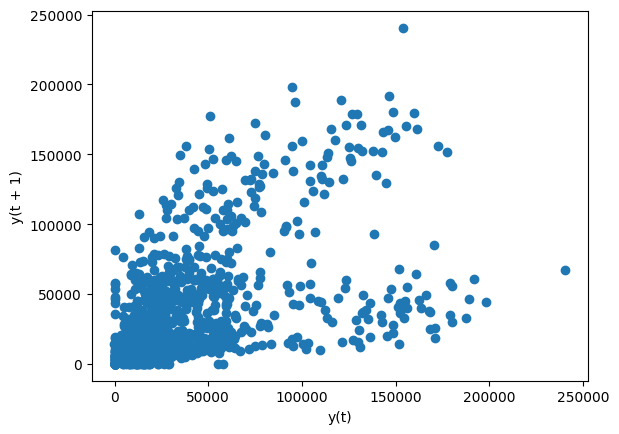

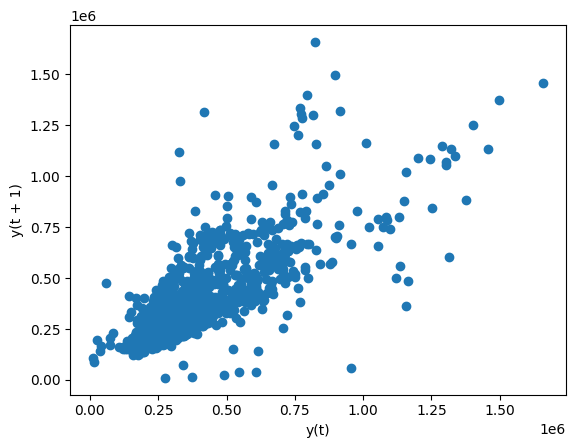

In [40]:
sales = pd.read_csv('data/caspecoTrainingData.csv')

dates = pd.date_range('2020-01-01', '2023-01-04')

sales = fill_in_dates(sales, dates)

#divide sales into Company
sales_company_1 = sales[sales['Company'] == 0]
sales_company_2 = sales[sales['Company'] == 1]
sales_company_3 = sales[sales['Company'] == 2]

sales_company_1.index = pd.to_datetime(sales_company_1['Date'])
sales_company_2.index = pd.to_datetime(sales_company_2['Date'])
sales_company_3.index = pd.to_datetime(sales_company_3['Date'])

sales_company_1 = sales_company_1.drop(columns=['Company', 'Date'])
sales_company_2 = sales_company_2.drop(columns=['Company', 'Date'])
sales_company_3 = sales_company_3.drop(columns=['Company', 'Date'])
lag_plot(sales_company_1)
plt.show()
lag_plot(sales_company_2)
plt.show()
lag_plot(sales_company_3)
plt.show()



Calculating ADF test for Company 1
ADF Statistic: -2.746344
p-value: 0.066356
Critical Values
	1%: -3.436
	5%: -2.864
	10%: -2.568
90.0% certain this is staionary
Reject H0: True
Calculating ADF test for Company 2
ADF Statistic: -2.392055
p-value: 0.143991
Critical Values
	1%: -3.436
	5%: -2.864
	10%: -2.568
Less than 90% certain that data is stationary
Reject H0: False
Calculating ADF test for Company 3
ADF Statistic: -3.000164
p-value: 0.034879
Critical Values
	1%: -3.436
	5%: -2.864
95.0% certain this is staionary
Reject H0: True


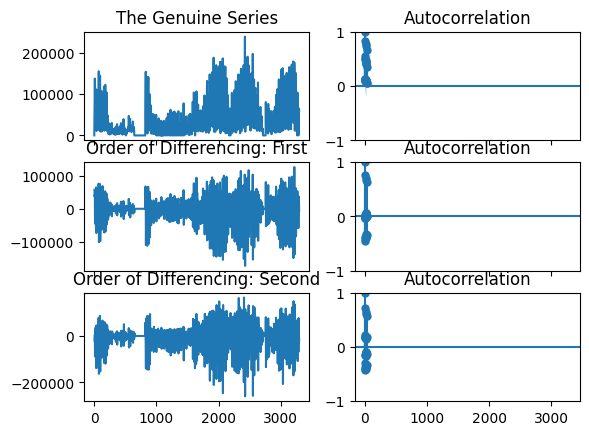

In [14]:
#AD fuller test taget från https://towardsdatascience.com/why-does-stationarity-matter-in-time-series-analysis-e2fb7be74454#:~:text=Stationarity%20is%20an%20important%20concept,is%20independent%20of%20one%20another.
from statsmodels.tsa.stattools import adfuller

def ADF_Cal(x):
    result = adfuller(x)
    ADF_stat = result[0]
    p = result[1]
    print("ADF Statistic: %f" % ADF_stat)
    print("p-value: %f" % p)
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print("{}% certain this is staionary".format(cert))
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))
print("Calculating ADF test for Company 1")
ADF_Cal(sales_company_1)
print("Calculating ADF test for Company 2")
ADF_Cal(sales_company_2)
print("Calculating ADF test for Company 3")
ADF_Cal(sales_company_3)

#Note: company 1 and 3 are stationary, company 2 is not. 
# d for company 2 is 1, d for company 1 and 3 is 0


# The Genuine Series  https://www.javatpoint.com/arima-model-in-python#:~:text=ARIMA%2C%20abbreviated%20for%20'Auto%20Regressive,order%20to%20forecast%20future%20values.
fig, axes = plt.subplots(3, 2, sharex = True)  
axes[0, 0].plot(sales_company_2); axes[0, 0].set_title('The Genuine Series')  
plot_acf(sales_company_2, ax = axes[0, 1])  
  
# Order of Differencing: First  
axes[1, 0].plot(sales_company_2.diff()); axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(sales_company_2.diff().dropna(), ax = axes[1, 1])  
  
# Order of Differencing: Second  
axes[2, 0].plot(sales_company_2.diff().diff()); axes[2, 0].set_title('Order of Differencing: Second')  
plot_acf(sales_company_2.diff().diff().dropna(), ax = axes[2, 1])  
  
plt.show()  

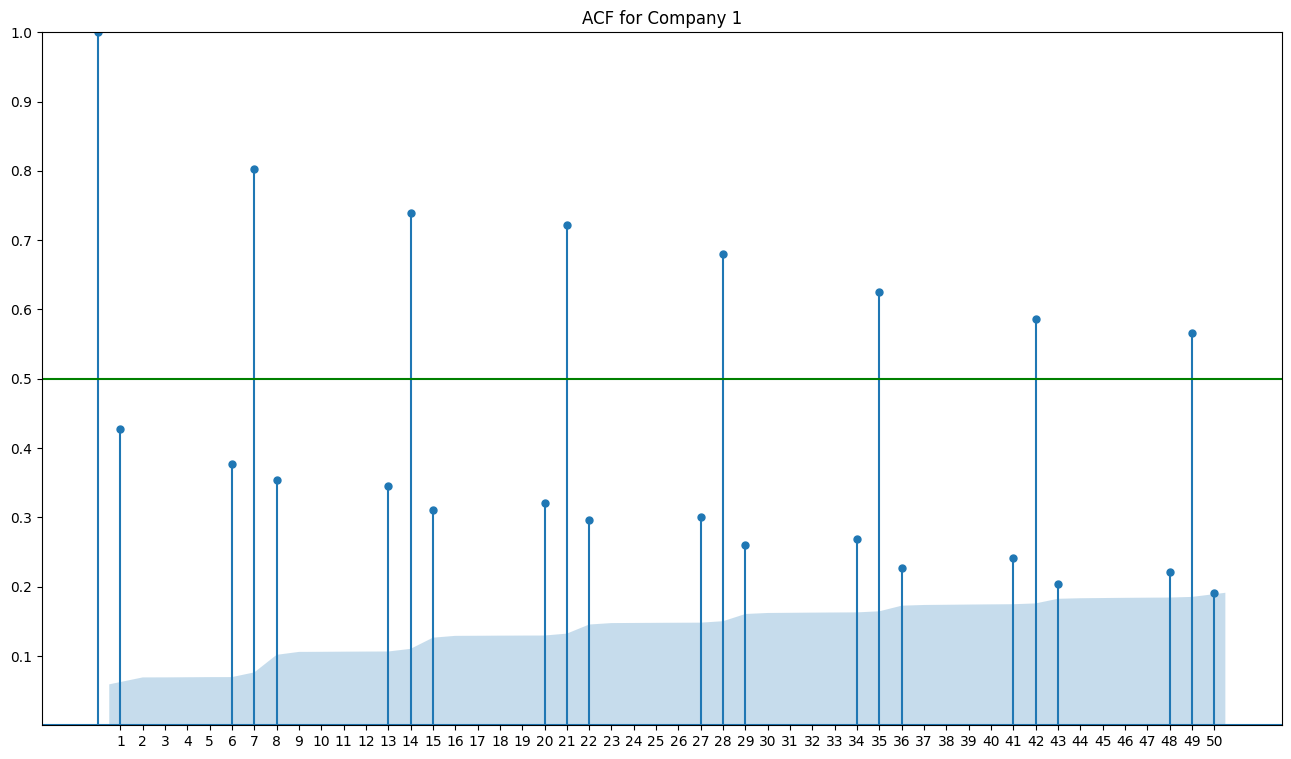

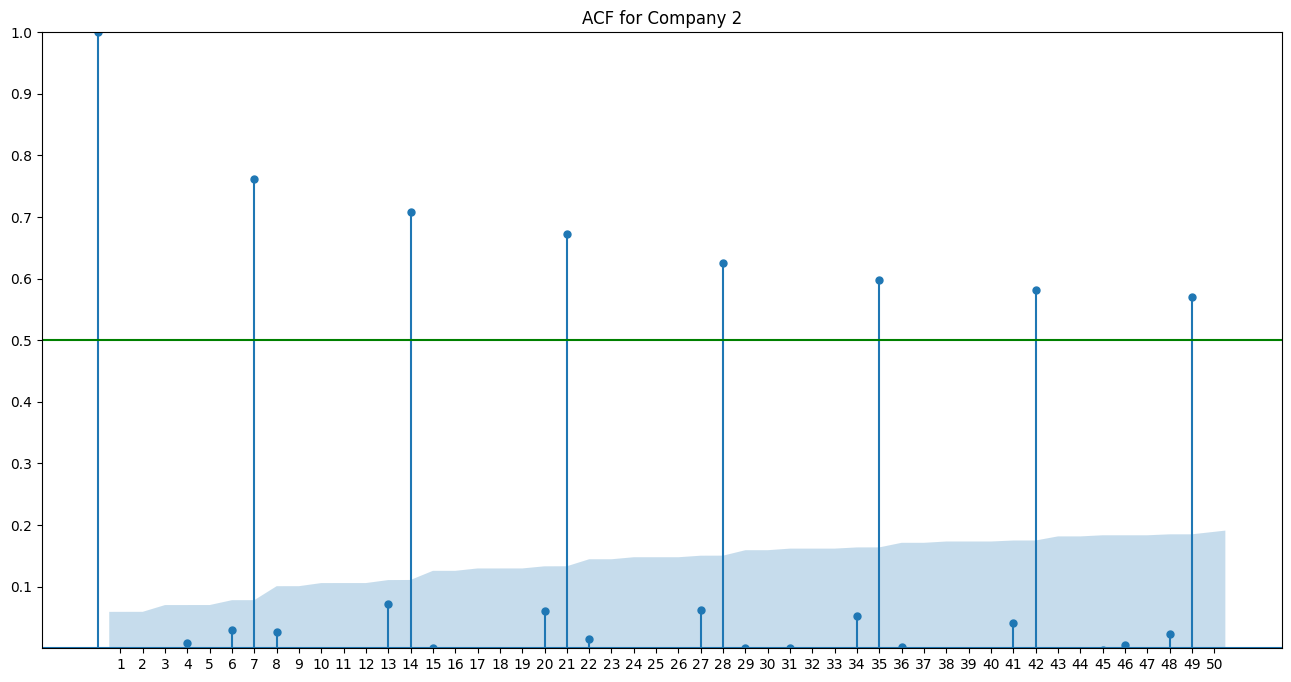

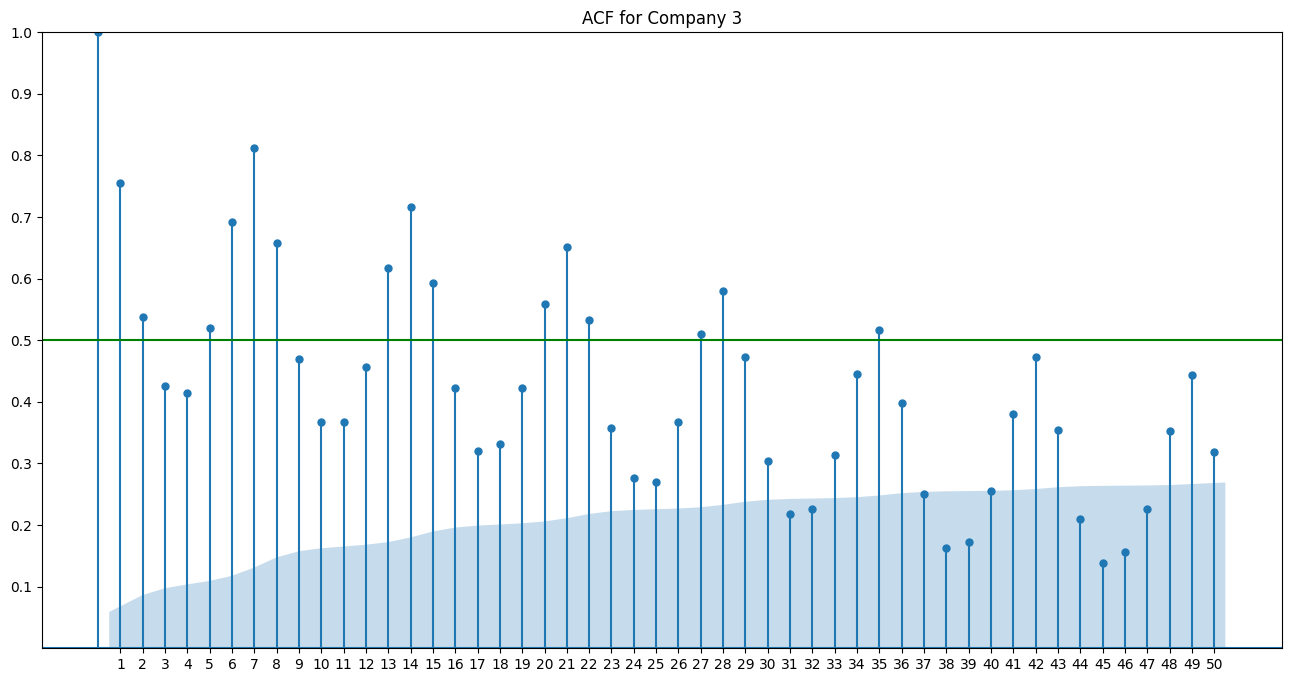

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(16,9))
plot_acf(sales_company_1, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("ACF for Company 1")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(sales_company_2.diff().dropna(), lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("ACF for Company 2")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(sales_company_3, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("ACF for Company 3")
plt.show()

# q for company 1 is 8/1
# q for company 2 is 8/1
# q for company 3 is 21/1


C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


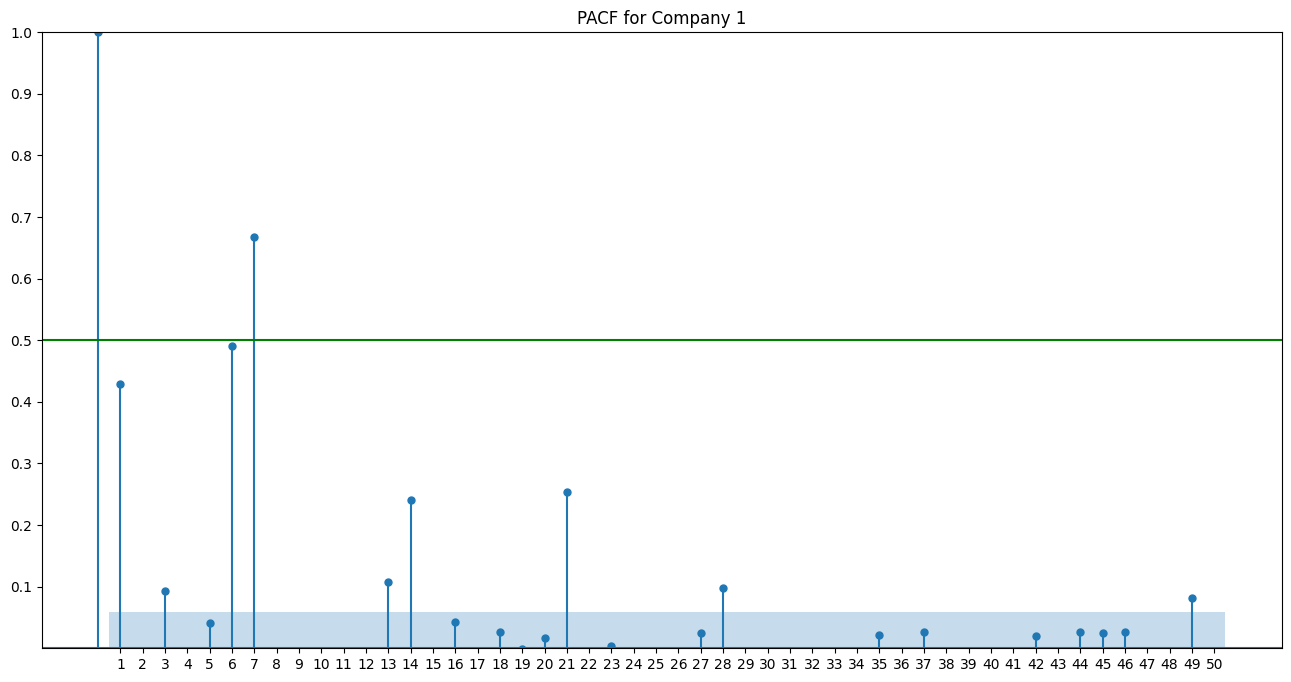

C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


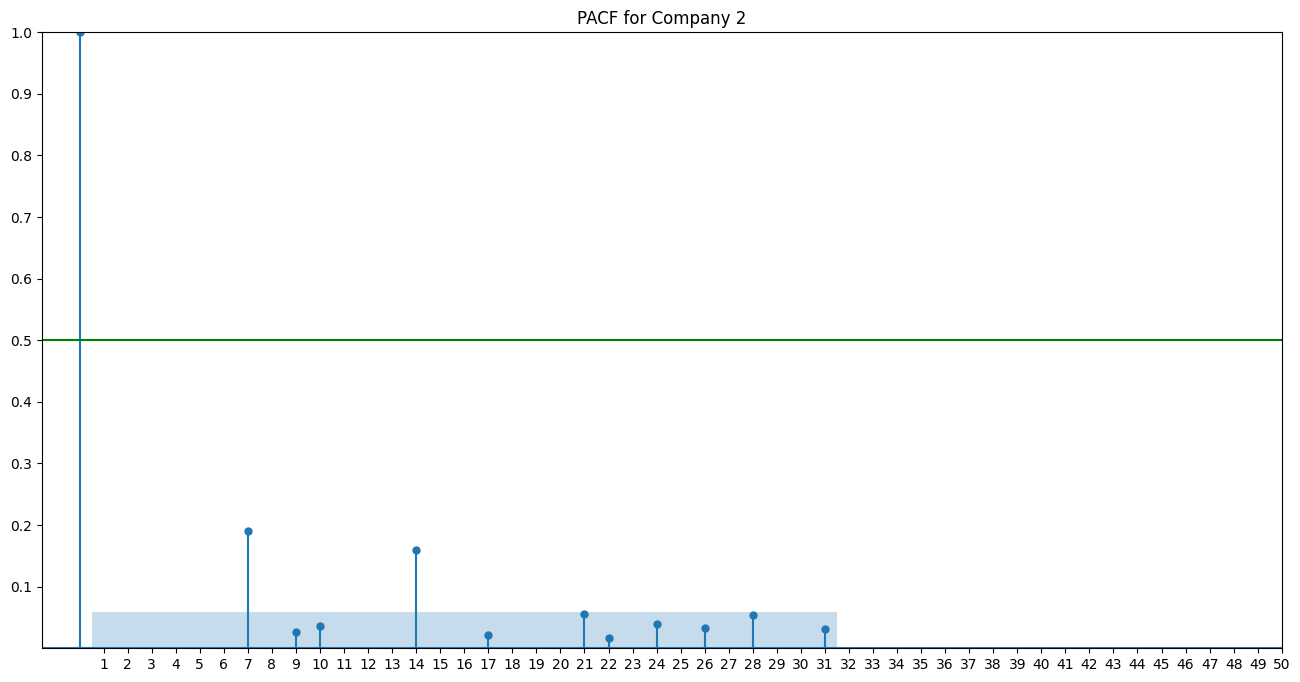

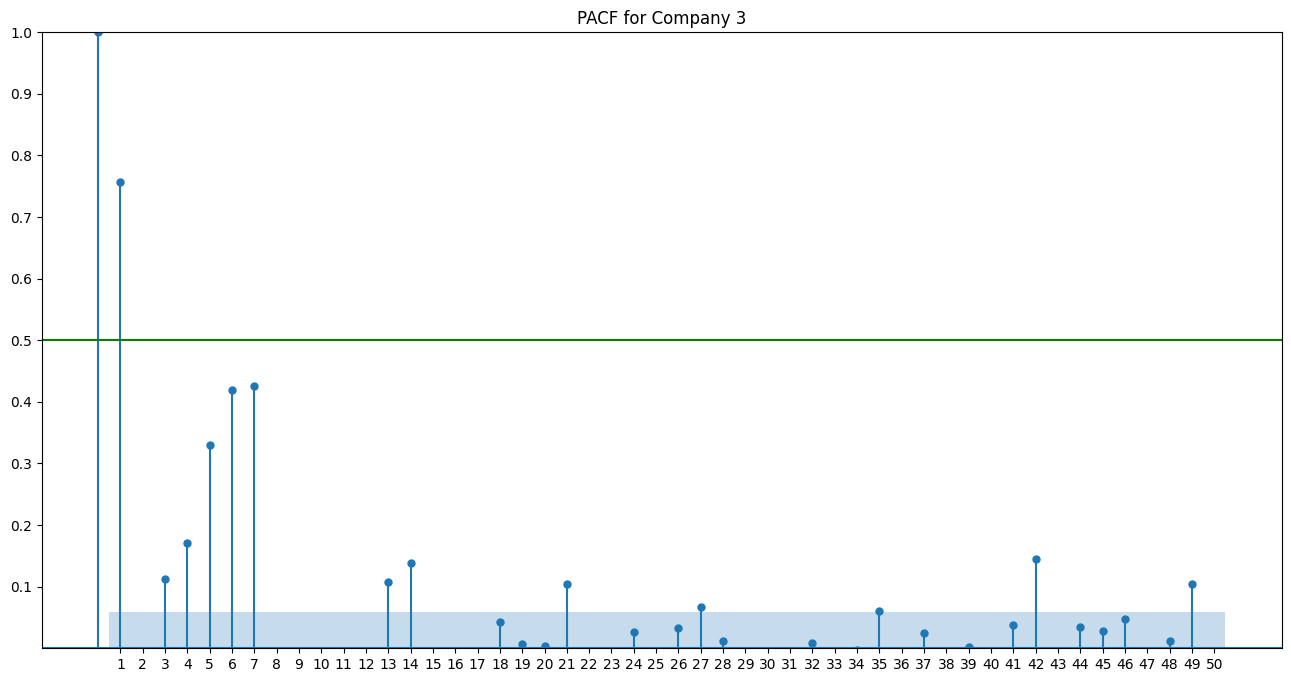

In [16]:


fig, ax = plt.subplots(figsize=(16,8))
plot_pacf(sales_company_1, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("PACF for Company 1")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_pacf(sales_company_2.diff().dropna(), ax = ax)  
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("PACF for Company 2")
plt.show()

fig, ax = plt.subplots(figsize=(16,8))
plot_pacf(sales_company_3, lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.title("PACF for Company 3")
plt.show()
# p for company 1 is 7/1
# p for company 2 is 7
# p for company 3 is 7/1



In [24]:
import statsmodels.api as sm
#print(sales_company_1)
# Creating ARIMA model  
mymodel_c1 = sm.tsa.arima.ARIMA(sales_company_1, order = (7,8,0))
#mymodel_c2 = sm.tsa.arima.ARIMA(sales_company_2, order = (1,7,8))
#mymodel_c3 = sm.tsa.arima.ARIMA(sales_company_3, order = (0,7,21))
modelfit_c1 = mymodel_c1.fit()
#modelfit_c2 = mymodel_c2.fit()
#modelfit_c3 = mymodel_c3.fit()
print(modelfit_c1.summary())
#print(modelfit_c2.summary())
#print(modelfit_c3.summary())




C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\annah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1100
Model:                 ARIMA(7, 8, 0)   Log Likelihood              -14581.738
Date:                Thu, 23 Feb 2023   AIC                          29179.475
Time:                        12:00:02   BIC                          29219.442
Sample:                             0   HQIC                         29194.600
                               - 1100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.4882      0.023   -154.624      0.000      -3.532      -3.444
ar.L2         -6.4102      0.081    -78.815      0.000      -6.570      -6.251
ar.L3         -7.8365      0.156    -50.329      0.0

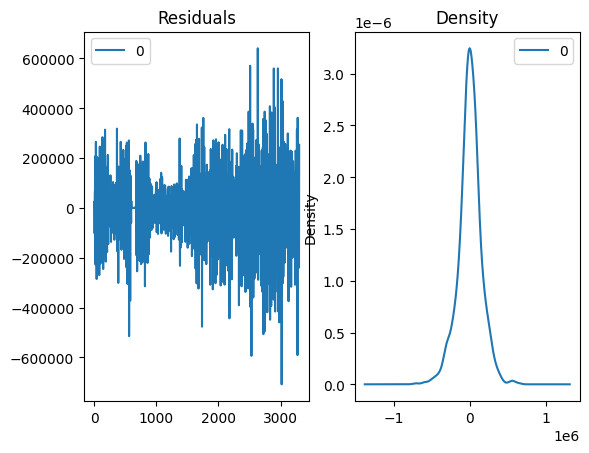

In [25]:
myresiduals = pd.DataFrame(modelfit_c1.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

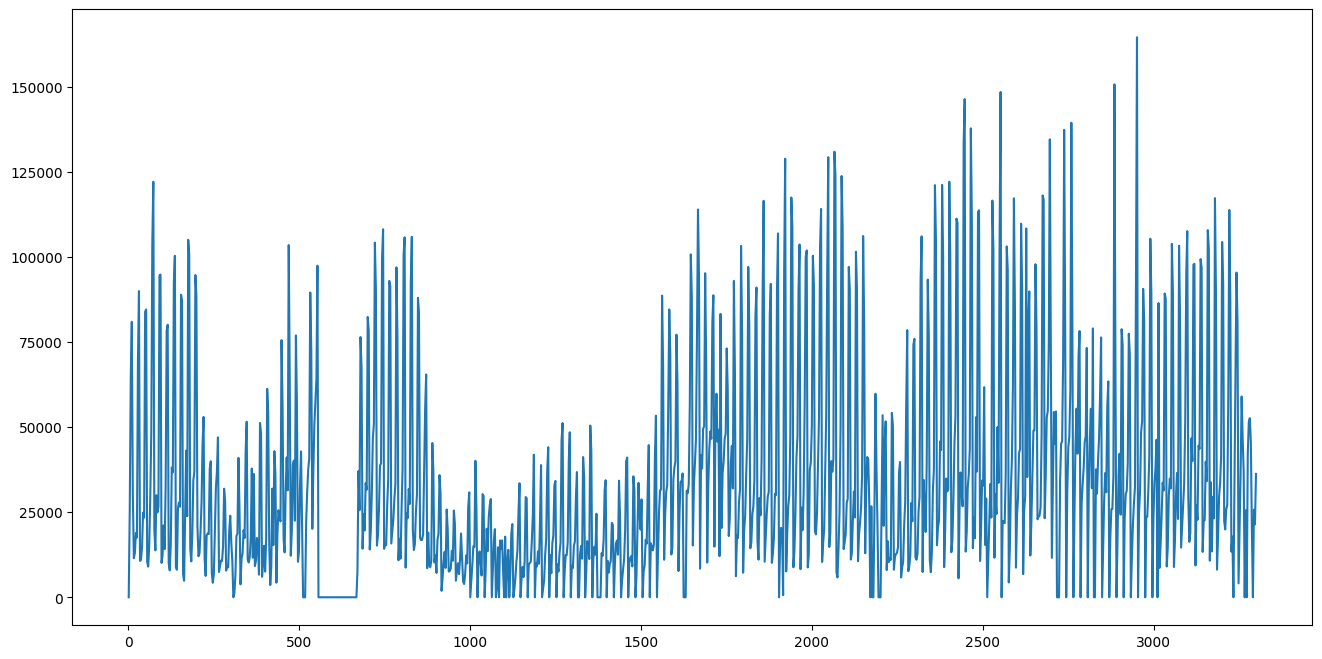

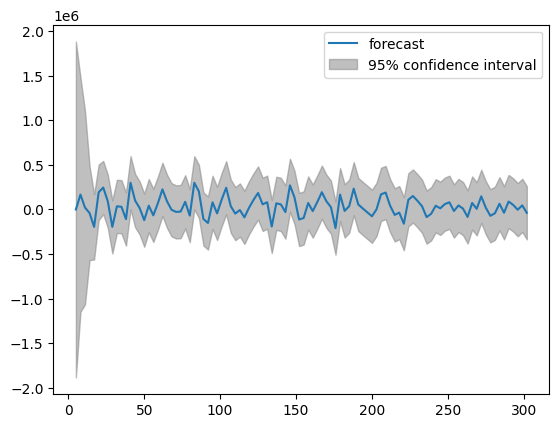

In [30]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(16,8))
#plot the actual values for comparison
ax.plot(sales_company_1, label='actual')
plot_predict(modelfit_c1, start = 1, end = 100)
plt.show()